# Basic Model Analysis

1. Fetch pre-processed data
2. Perform PCA
3. Train and compare PCA Models Performance

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

#sklearn Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict

# Libraries for ploting charts
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib notebook
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**1. Fetch pre-processed data**

In [3]:
data_pca = pd.DataFrame()

data_pca = pd.read_csv('../datasets/data-pca-preprocessed.csv', low_memory=False)

In [4]:
# Set input and output values
x = data_pca.iloc[:,:len(data_pca.columns)-1]
y = data_pca['total']
x

,make_model,make,model,generation,year_from,year_to,series,trim,body_type,load_height_mm,...,country_of_origin,number_of_doors,safety_assessment,rating_name,battery_capacity_KW_per_h,electric_range_km,charging_time_h,male,female,unknown
0,0.000000,0.0,0.000000,0.000876,0.012987,0.013889,0.000000,0.000000,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000876,0.012987,0.013889,0.000000,0.000178,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000876,0.012987,0.013889,0.000000,0.000357,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000876,0.012987,0.013889,0.000000,0.000535,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000876,0.012987,0.013889,0.000000,0.000714,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43042,0.998984,1.0,0.998943,0.000876,0.220779,0.069444,0.003891,0.362063,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
43043,0.998984,1.0,0.998943,0.000876,0.220779,0.069444,0.003891,0.016595,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
43044,0.998984,1.0,0.998943,0.000876,0.220779,0.069444,0.003891,0.362420,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
43045,1.000000,1.0,1.000000,0.000876,0.220779,0.069444,0.003891,0.115453,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


**2. Perform PCA**

Scale the data to the range between 0 and 1 before performing  PCA!

In [5]:
# Scale the features
sc = StandardScaler()
Xs = sc.fit_transform(x)

In [6]:
# The PCA model
components = 80
pca = PCA(n_components = components) # estimate first 80 PCs
X_new = pca.fit_transform(Xs) # project the original data into the PCA space

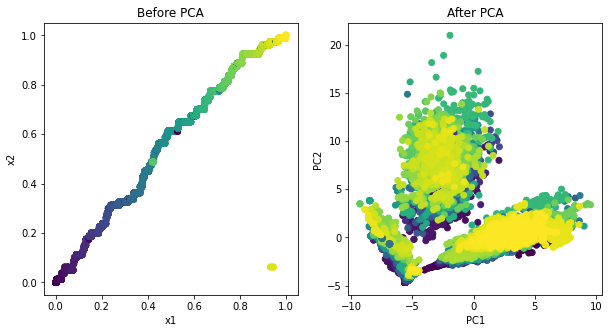

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

axes[0].scatter(x.iloc[:,0], x.iloc[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [8]:
# print the explained variances
print("Explained Variances (%):")
print(pca.explained_variance_ratio_ * 100)
print()

Explained Variances (%):
[11.79054334 10.29216796  8.40861181  3.97953724  3.09482015  2.79882972
  2.40340477  2.30818063  2.12445208  1.99623692  1.86329589  1.64824869
  1.5819709   1.51242248  1.41388072  1.34697189  1.26316286  1.24729518
  1.23647179  1.19758109  1.14592177  1.11149924  1.08095507  1.04382599
  1.01855804  1.00405609  0.9912814   0.95164371  0.93512778  0.90413039
  0.88137646  0.86382167  0.84986649  0.83597979  0.82638278  0.80111605
  0.79700822  0.78311566  0.77311973  0.75885397  0.74424135  0.74061803
  0.70727493  0.69040014  0.68427633  0.67932788  0.66261276  0.64638145
  0.63588338  0.6305731   0.62455952  0.59902487  0.5925328   0.56654662
  0.56113926  0.55557341  0.54150532  0.52573016  0.5155643   0.5097265
  0.50250989  0.47835005  0.47190342  0.45535987  0.43747802  0.40942377
  0.39528811  0.36129927  0.34403783  0.33486297  0.28838967  0.26577087
  0.26286603  0.21218929  0.20349651  0.08411744  0.07346306  0.06189791
  0.04844915  0.02484423]



In [9]:
print("Cumulative Explained Variances (%):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Explained Variances (%):
[11.79054334 22.0827113  30.49132311 34.47086035 37.56568049 40.36451021
 42.76791499 45.07609562 47.2005477  49.19678462 51.06008051 52.7083292
 54.2903001  55.80272258 57.21660329 58.56357519 59.82673805 61.07403323
 62.31050501 63.5080861  64.65400787 65.76550711 66.84646217 67.89028817
 68.90884621 69.9129023  70.9041837  71.85582741 72.79095519 73.69508558
 74.57646204 75.44028371 76.2901502  77.12612999 77.95251277 78.75362881
 79.55063704 80.3337527  81.10687242 81.8657264  82.60996775 83.35058578
 84.0578607  84.74826084 85.43253717 86.11186505 86.77447781 87.42085926
 88.05674264 88.68731574 89.31187526 89.91090013 90.50343293 91.06997955
 91.6311188  92.18669221 92.72819753 93.25392769 93.76949199 94.27921849
 94.78172839 95.26007843 95.73198186 96.18734173 96.62481975 97.03424352
 97.42953163 97.7908309  98.13486873 98.4697317  98.75812137 99.02389223
 99.28675827 99.49894756 99.70244407 99.7865615  99.86002457 99.92192248
 99.97037162 99.

**A scree plot**

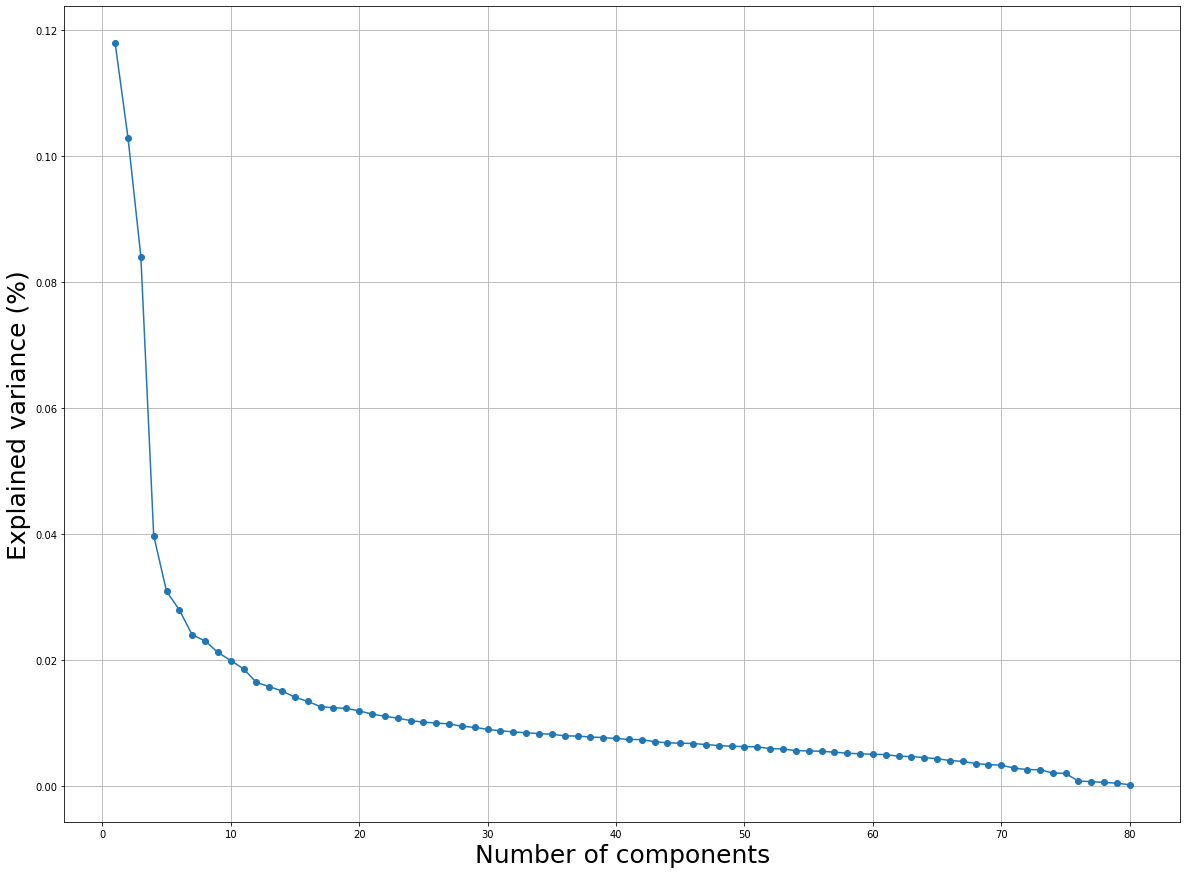

In [10]:

components = len(pca.explained_variance_ratio_) \
    if components is None else components
  
plt.figure(figsize = (20,15))
plt.plot(range(1,components+1), pca.explained_variance_ratio_, color='tab:blue', marker='o')
plt.xlabel("Number of components", fontsize=25)
plt.ylabel("Explained variance (%)", fontsize=25)
plt.grid()


**Biplot function to plot the two principal components on the same plot**

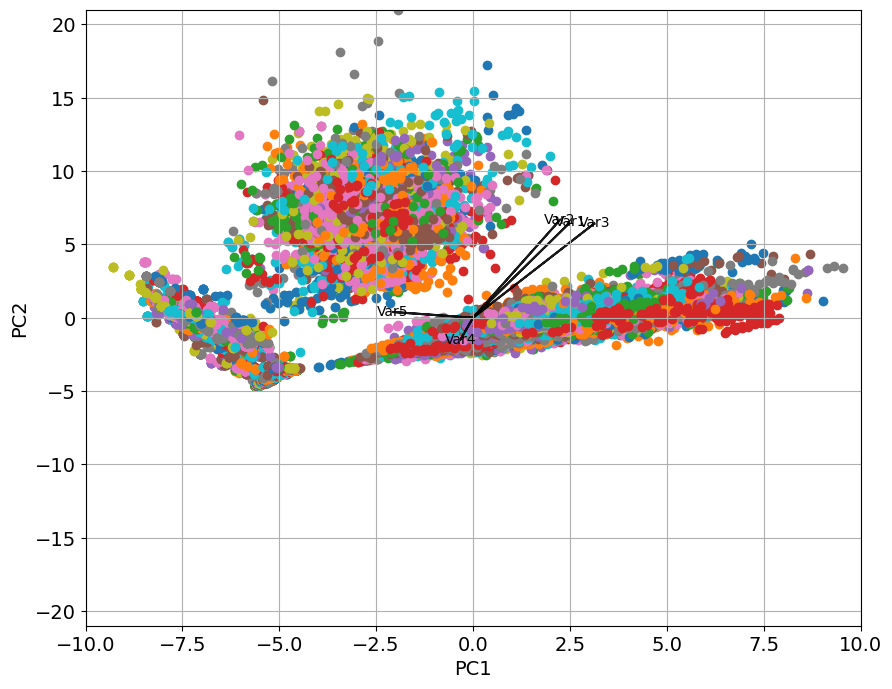

In [11]:
def biplot(score, coeff , y):
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = 5 #coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    zoom=100
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l])
    for i in range(n):
       
        plt.arrow(0, 0, coeff[i,0] * zoom, coeff[i,1] * zoom, color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* zoom, coeff[i,1] * zoom, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

**Split the dataset**

In [12]:
# perform a split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, shuffle=True, random_state=10)

**Train and compare PCA Models Performance**

In [13]:
# Function for evaluating model performance using PCA
def pca_model_performance(model,model_name,X_train = X_train,y_train = y_train, X_test = X_test,y_test = y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    Training_Score = np.round(model.score(X_train,y_train),20)
    Testing_Score = np.round(model.score(X_test,y_test),20)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),20)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),20)
    
    rmse_training = np.round(mean_squared_error(y_train,y_train_pred, squared=False),20)
    rmse_testing = np.round(mean_squared_error(y_test,y_test_pred, squared=False),20)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),20)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),20)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),20)
    r2_testing = np.round(r2_score(y_test,y_test_pred),20)
    
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data MSE:",mse_training)
    print("Testing Data MSE:",mse_testing)
    print("")
    
    print("Training Data RMSE:",rmse_training)
    print("Testing Data RMSE:",rmse_testing)
    print("")
    
    print("Training Data MAE:",mae_training)
    print("Testing Data MAE:",mae_testing)
    print("")
    
    print("Training Data R2:",r2_training)
    print("Testing Data R2:",r2_testing)
    print("")
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions', alpha=0.5)
    plt.title("Training Predictions v/s Testing Predictions")
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize = (20,5))
    plt.scatter(x=y_train, y=y_train_pred, c="#6495ED", alpha=0.3)
    z = np.polyfit(y_train, y_train_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_train,p(y_train),"#DC143C")
    plt.ylabel('Predicted Sales')
    plt.xlabel('Real Sales')
    
    
    return Training_Score,Testing_Score,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing


In [14]:
_sc = StandardScaler()
_minmax = MinMaxScaler()
_pca = PCA(n_components = components)

# 1. Linear Regresssion

In [15]:
_model = LinearRegression()

# create pipeline for quick computation
LR_pca_model = Pipeline([
    ('scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# train the model using the PCA components
LR_pca_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor', LinearRegression())])

Model Performance for: Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor', LinearRegression())])

Training Score: 0.9871492224441182
Testing Score: 0.9883792084807947

Training Data MSE: 0.0011201683008597882
Testing Data MSE: 0.0010078807547077118

Training Data RMSE: 0.033468915441940875
Testing Data RMSE: 0.031747137740396565

Training Data MAE: 0.012302954744411143
Testing Data MAE: 0.011813352624558049

Training Data R2: 0.9871492224441182
Testing Data R2: 0.9883792084807947

Residual Analysis:


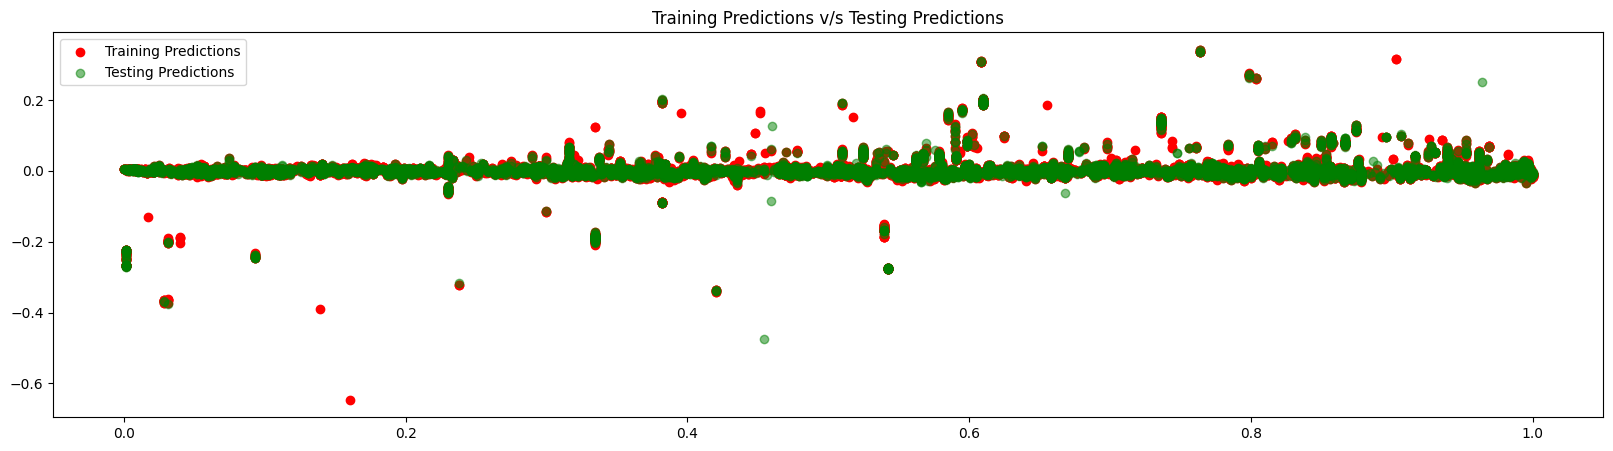

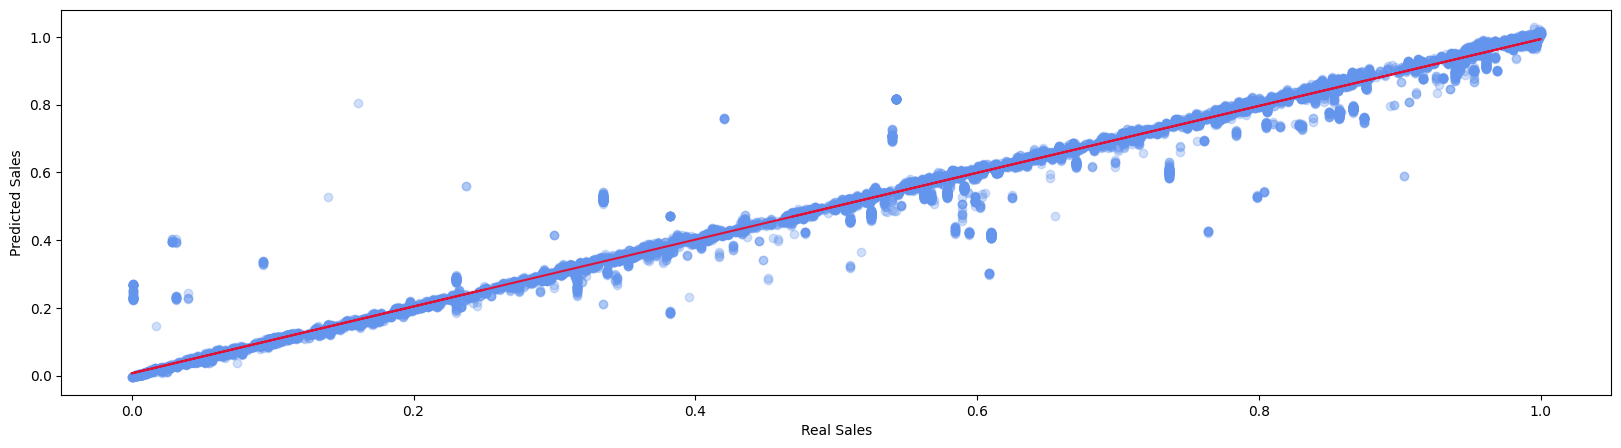

In [16]:
LR_pca_performance = pca_model_performance(LR_pca_model,model_name = LR_pca_model)

# 2. Ridge Regresssion

In [17]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Ridge(),param_grid = param_grid,cv=4)
grid.fit(x,y)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': array([0.82112515, 0.11905341, 0.20552575, 0.15796225, 0.19344194,
       0.33569207, 0.05766865, 0.08634703, 0.52406979, 0.0065608 ,
       0.8465107 , 0.29111185, 0.42974652, 0.53144718, 0.532486  ,
       0.93975937, 0.34107676, 0.30192579, 0.45803337, 0.40594667,
       0.96721453, 0.33567202, 0.65464648, 0.90956863, 0.34127308,
       0.57668234, 0.919...
       0.89677052, 0.87083376, 0.64333374, 0.36440272, 0.66083833,
       0.47484386, 0.33150581, 0.06491545, 0.26045987, 0.90563723,
       0.1709631 , 0.85405255, 0.94140557, 0.15379938, 0.34338879,
       0.90455584, 0.9690458 , 0.69418955, 0.43988637, 0.02116559,
       0.49742032, 0.62407511, 0.34793766, 0.40485799, 0.06299196,
       0.22548275, 0.05128627, 0.64762792, 0.9617635 , 0.3770116 ,
       0.94518527, 0.96124399, 0.97922382, 0.47199298, 0.3421267 ])})

In [18]:
RR_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', grid.best_estimator_)
])

RR_pca_model.fit(X_train,y_train)


Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor', Ridge(alpha=0.9792238245475738))])

Model Performance for: Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor', Ridge(alpha=0.9792238245475738))])

Training Score: 0.987149187138116
Testing Score: 0.988379186836595

Training Data MSE: 0.001120171378390643
Testing Data MSE: 0.0010078826319268586

Training Data RMSE: 0.0334689614178666
Testing Data RMSE: 0.031747167305554345

Training Data MAE: 0.01229915240613813
Testing Data MAE: 0.011809274882951127

Training Data R2: 0.987149187138116
Testing Data R2: 0.988379186836595

Residual Analysis:


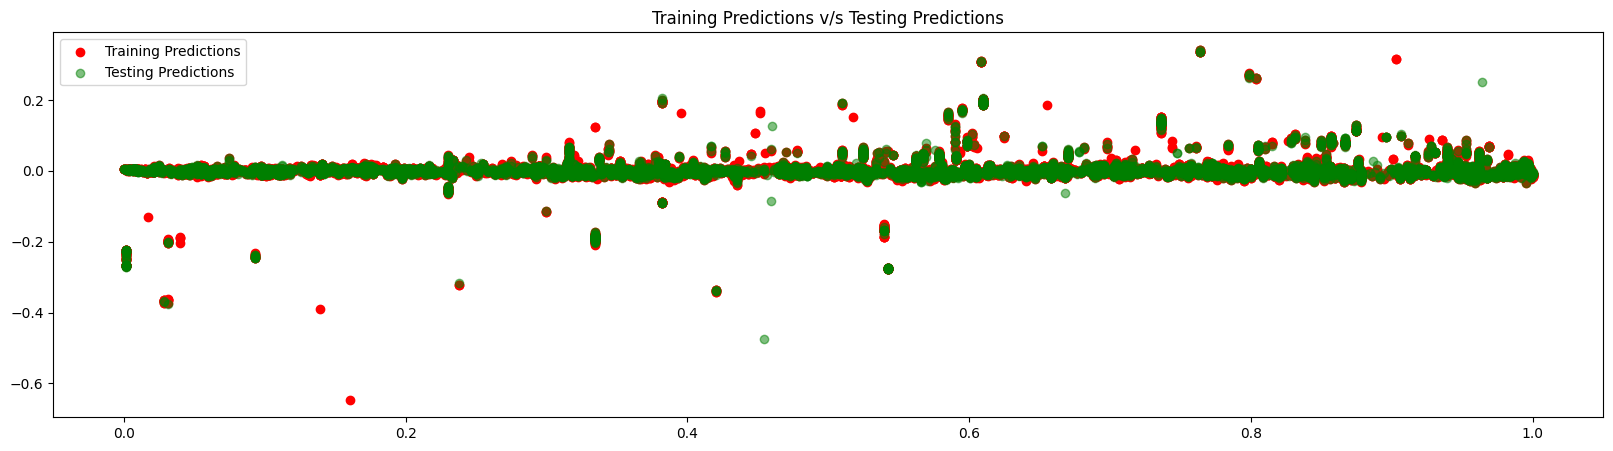

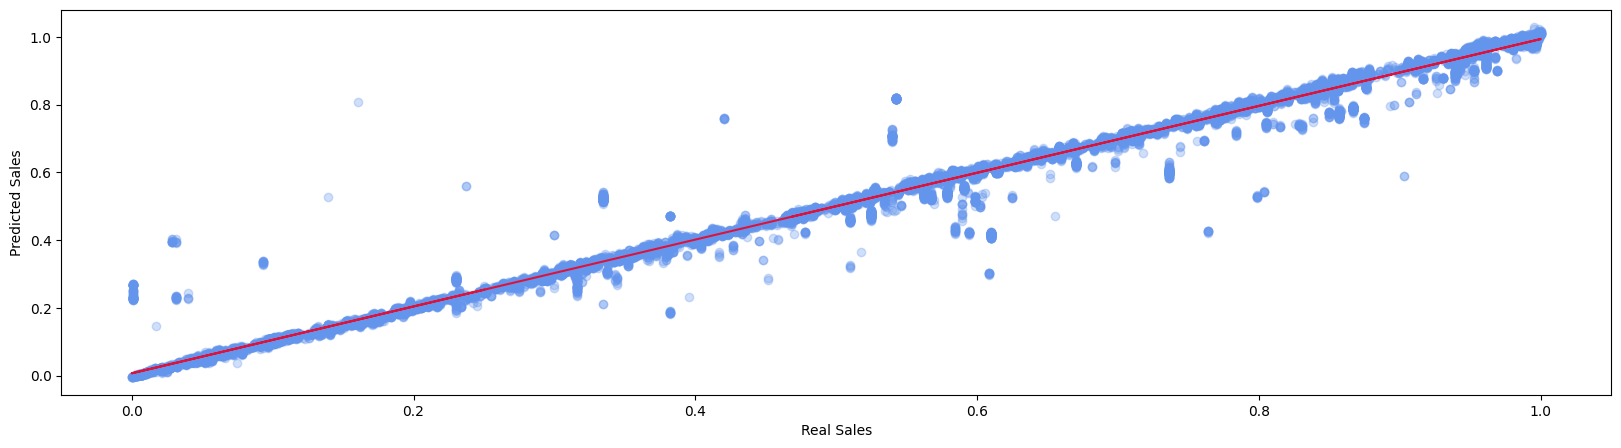

In [19]:
R_pca_performance = pca_model_performance(RR_pca_model,model_name = RR_pca_model)

# 3. Lasso

In [20]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Lasso(),param_grid = param_grid,cv=4)
grid.fit(x,y)


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': array([0.22654481, 0.77063095, 0.77395194, 0.42953879, 0.28383083,
       0.33319882, 0.45921654, 0.59616592, 0.48049908, 0.85785813,
       0.07903708, 0.49915716, 0.27776302, 0.2517045 , 0.48968898,
       0.52271563, 0.40543508, 0.02105662, 0.21343336, 0.55110346,
       0.36420072, 0.5144816 , 0.22196043, 0.07069053, 0.26655228,
       0.69624696, 0.1...
       0.09331442, 0.06201267, 0.18868516, 0.03302555, 0.39944276,
       0.50173851, 0.91291043, 0.85021758, 0.6314134 , 0.22664934,
       0.14396158, 0.85082955, 0.35139995, 0.11778389, 0.27525477,
       0.79338062, 0.21604596, 0.82816438, 0.39866744, 0.91471054,
       0.57340419, 0.86544155, 0.50443809, 0.74204523, 0.36388703,
       0.18856949, 0.72671275, 0.52203677, 0.79914044, 0.25489163,
       0.43651002, 0.21314807, 0.21221297, 0.58246618, 0.69385916])})

In [21]:
L_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', grid.best_estimator_)
])

L_pca_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor', Lasso(alpha=0.02105662444024914))])

Model Performance for: Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor', Lasso(alpha=0.02105662444024914))])

Training Score: 0.9514946602612331
Testing Score: 0.9526079753295296

Training Data MSE: 0.004228082212265245
Testing Data MSE: 0.004110349068138769

Training Data RMSE: 0.06502370500260074
Testing Data RMSE: 0.06411200408768056

Training Data MAE: 0.0453829950554018
Testing Data MAE: 0.045164419652240495

Training Data R2: 0.9514946602612331
Testing Data R2: 0.9526079753295296

Residual Analysis:


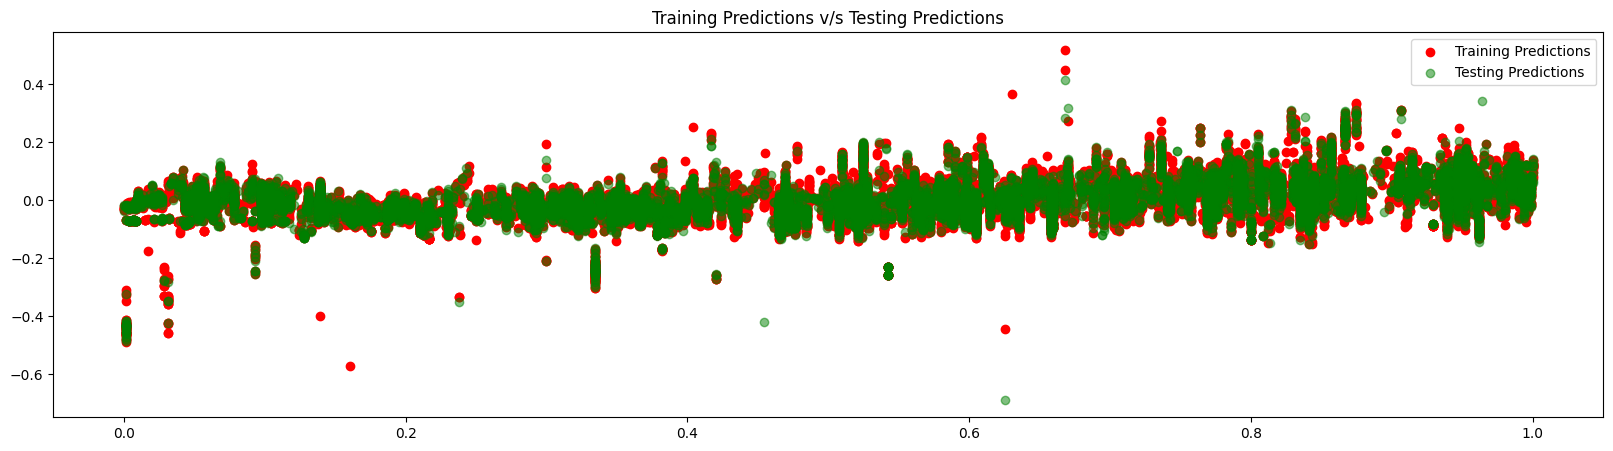

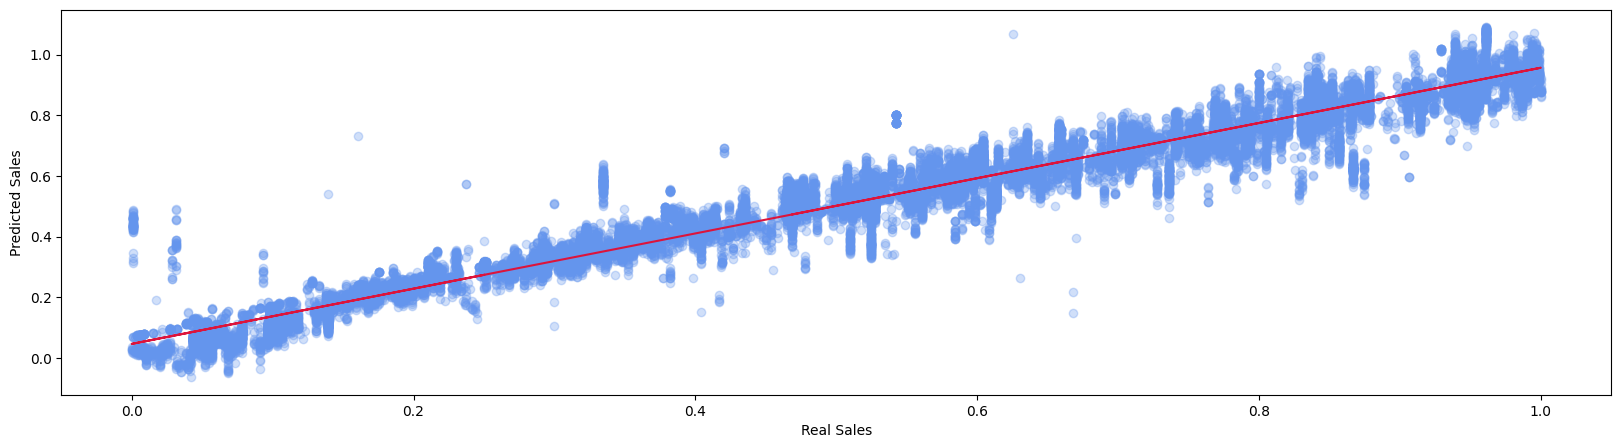

In [22]:
L_pca_performance = pca_model_performance(L_pca_model,model_name = L_pca_model)

# 4. Random Forest

In [23]:
param_grid = {'max_depth':np.arange(1,5),'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
grid = GridSearchCV(RandomForestRegressor(),param_grid = param_grid,cv=3)
grid.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

In [24]:
RF_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', grid.best_estimator_)
])

RF_pca_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor',
                 RandomForestRegressor(max_depth=4, min_samples_leaf=3,
                                       min_samples_split=4))])

Model Performance for: Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=80)),
                ('regressor',
                 RandomForestRegressor(max_depth=4, min_samples_leaf=3,
                                       min_samples_split=4))])

Training Score: 0.9203844268600156
Testing Score: 0.9211925285341049

Training Data MSE: 0.0069398789994132085
Testing Data MSE: 0.006835036467729777

Training Data RMSE: 0.08330593615951512
Testing Data RMSE: 0.08267427936020838

Training Data MAE: 0.058104884015979644
Testing Data MAE: 0.05810908344545393

Training Data R2: 0.9203844268600156
Testing Data R2: 0.9211925285341049

Residual Analysis:


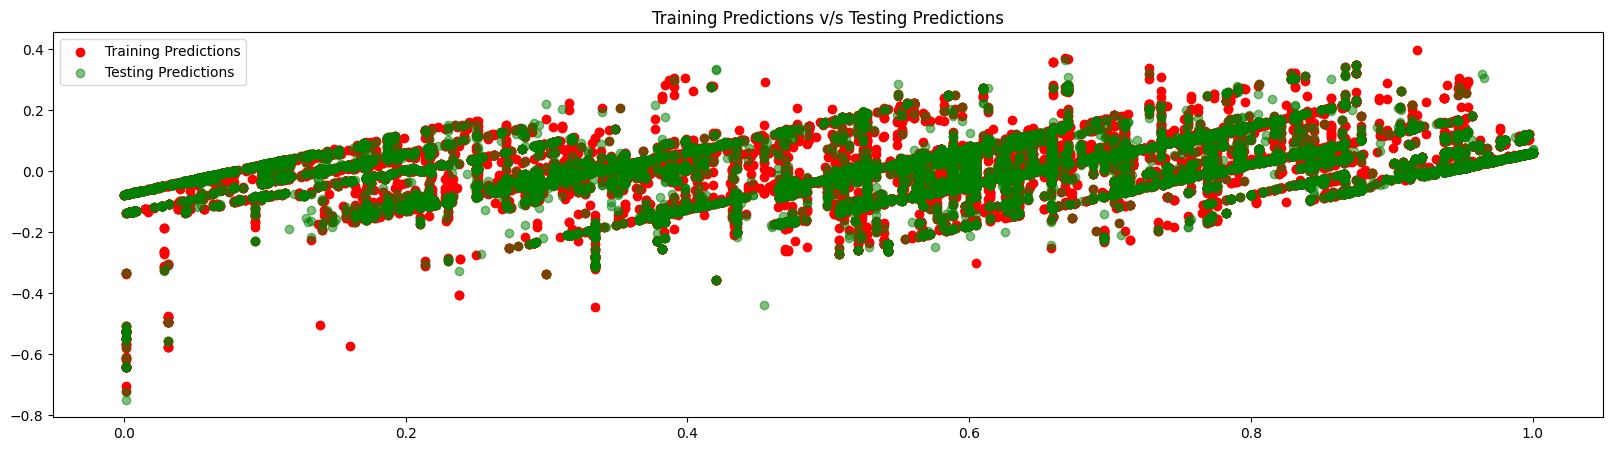

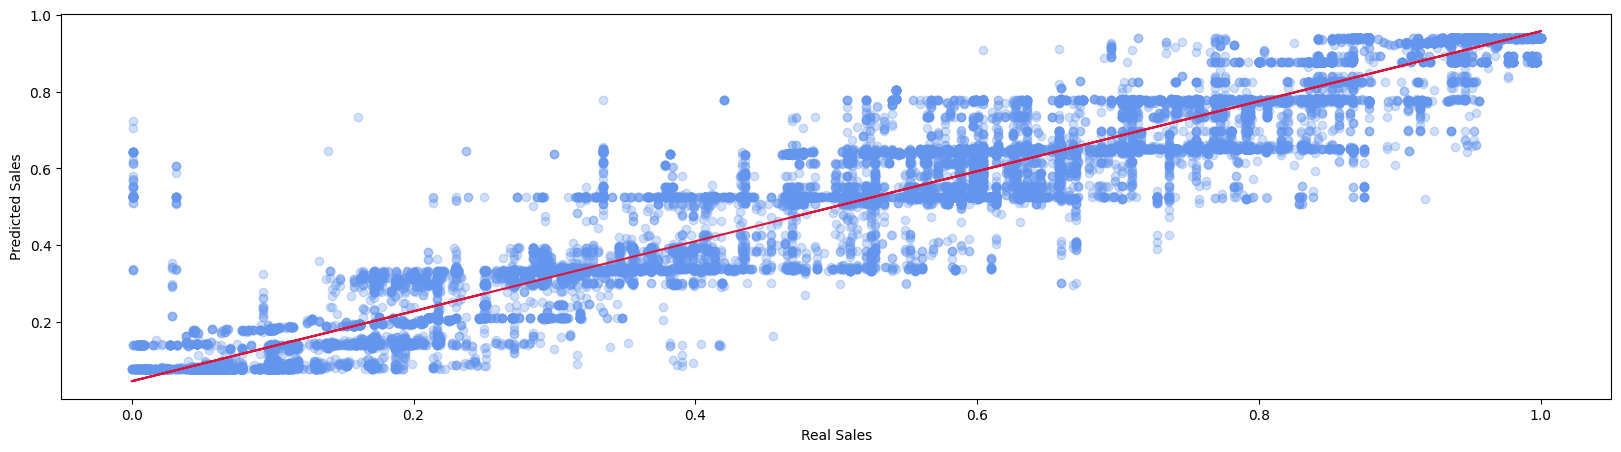

In [25]:
RF_pca_performance = pca_model_performance(RF_pca_model,model_name = RF_pca_model)

**PCA Model Performance**

In [26]:
pca_performance = [["Linear Regression",LR_pca_performance[0],LR_pca_performance[1],LR_pca_performance[2],LR_pca_performance[3],LR_pca_performance[4],LR_pca_performance[5],LR_pca_performance[6],LR_pca_performance[7]],
                     ["Ridge",R_pca_performance[0],R_pca_performance[1],R_pca_performance[2],R_pca_performance[3],R_pca_performance[4],R_pca_performance[5],R_pca_performance[6],R_pca_performance[7]],
                     ["Lasso",L_pca_performance[0],L_pca_performance[1],L_pca_performance[2],L_pca_performance[3],L_pca_performance[4],L_pca_performance[5],L_pca_performance[6],L_pca_performance[7]],
                     ["Random Forest",RF_pca_performance[0],RF_pca_performance[1],RF_pca_performance[2],RF_pca_performance[3],RF_pca_performance[4],RF_pca_performance[5],RF_pca_performance[6],RF_pca_performance[7]],
                     ]

In [27]:
pca_performance = pd.DataFrame(pca_performance,columns = ['Models (PCA)',"Train Score","Test Score","Train MSE",'Test MSE','Train MAE',"Test MAE",'Train R2',"Test R2"])
pca_performance

,Models (PCA),Train Score,Test Score,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,0.987149,0.988379,0.001120,0.001008,0.012303,0.011813,0.987149,0.988379
1,Ridge,0.987149,0.988379,0.001120,0.001008,0.012299,0.011809,0.987149,0.988379
2,Lasso,0.951495,0.952608,0.004228,0.004110,0.045383,0.045164,0.951495,0.952608
3,Random Forest,0.920384,0.921193,0.006940,0.006835,0.058105,0.058109,0.920384,0.921193


<AxesSubplot:title={'center':'Training R2 v/s Testing R2'}, xlabel='Models (PCA)', ylabel='R-Squared Score'>

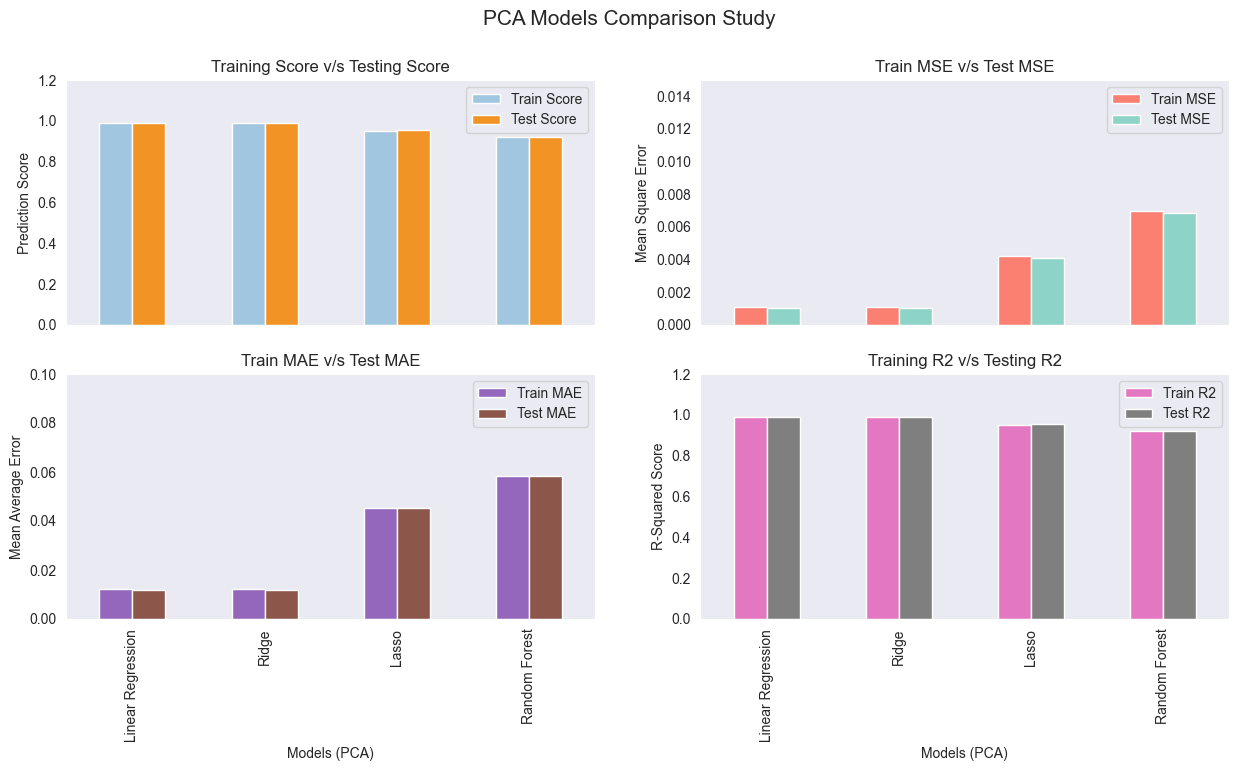

In [28]:
sb.set_style("dark")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.suptitle('PCA Models Comparison Study', fontsize=15)

pca_performance[["Models (PCA)","Train Score", "Test Score"]].plot(ax=ax1, x="Models (PCA)", ylabel="Prediction Score", kind="bar", 
                                                         title="Training Score v/s Testing Score", color=['#A1C7E0', "#F29325"], 
                                                         figsize=(15,7), ylim=(0,1.2))

pca_performance[["Models (PCA)","Train MSE", "Test MSE"]].plot(ax=ax2, x="Models (PCA)", ylabel="Mean Square Error", kind="bar", 
                                                     title="Train MSE v/s Test MSE", color=['#fb8072', "#8dd3c7"],
                                                     figsize=(15,7), ylim=(0,0.015))

pca_performance[["Models (PCA)","Train MAE", "Test MAE"]].plot(ax=ax3, x="Models (PCA)", ylabel="Mean Average Error", kind="bar", 
                                                     title="Train MAE v/s Test MAE", color=['#9467bd', "#8c564b"],
                                                     figsize=(15,7), ylim=(0,0.1))

pca_performance[["Models (PCA)","Train R2", "Test R2"]].plot(ax=ax4, x="Models (PCA)", ylabel="R-Squared Score", kind="bar", 
                                                   title="Training R2 v/s Testing R2", color=['#e377c2', "#7f7f7f"],
                                                     figsize=(15,7), ylim=(0,1.2))